# Data Analysis Tutorial

### This notebook serves as a guide to the steps taken to understanding and working with the EEG data

## Step 1 displaying sample data:

We firstly begin by creating an example of one sample of raw bdf data from a subject. We have omitted the subjects name for confidentiality by renaming the sample data as 'Example'. The data is added into the workspace inside a data folder that we path to as seen below. We then set the channel types for the graph and the montage. Using two on the .MNE library functions we can then plot the data along with its PSD plot. 

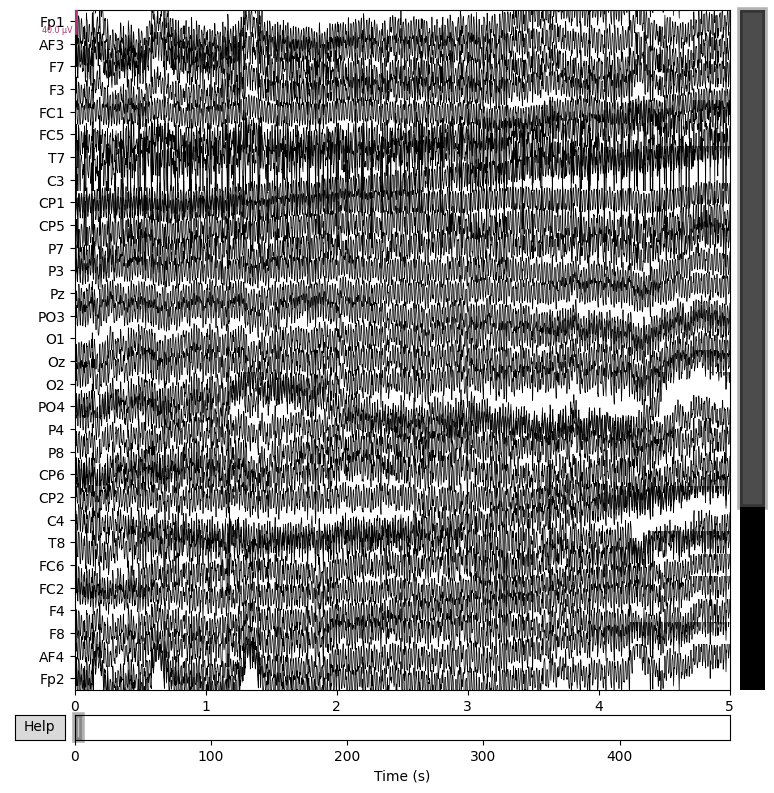

c:\Users\Bogdan\miniconda3\envs\eeg_analysis\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


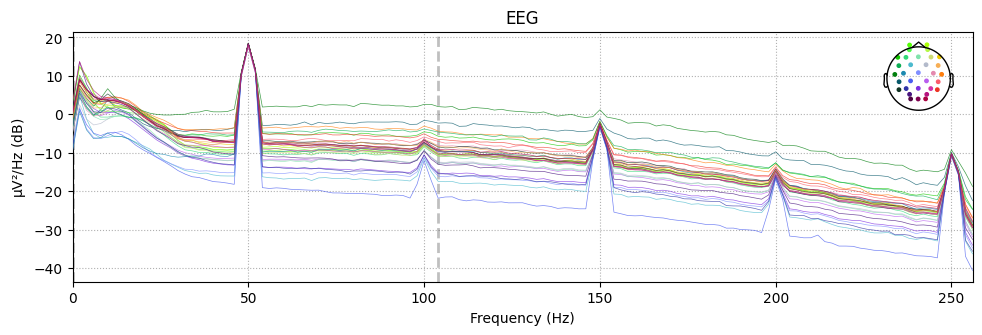

In [2]:
#import the mne library
import os
import mne
import numpy as np
from mne.preprocessing import ICA

#set the logging level
mne.set_log_level('CRITICAL')

#set the data file path
data = mne.io.read_raw_bdf('..\Data\example.bdf', preload = True)

subjects = ["11"]
trials = ["2"]
tasks = ["VPA"]
folder_loc = f""
VPA_picks = ["PO3", "PO4", "Pz"]
task = "VPA"
window = [0.2,0.4]

#function to set the meta data by selecting which channels type we want and which channels we wish to drop
def set_meta_data(raw):
    raw.set_channel_types({'EXG1': 'misc','EXG2':'misc','EXG3':'misc','EXG4':'misc','EXG5':'eog','EXG6': 'eog','EXG7':'misc','EXG8':'misc'})
    
    try:
        raw.drop_channels(['GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp'])
    except:
        pass
    
    raw.set_montage('standard_1020')

#set the meta data for the example
set_meta_data(data)


#plot the raw data, we can set the duration of the graph in seconds and how many channels are passed in through parameters in the function call
data.plot(duration = 5, n_channels = 30);
#plot the Power Spectral Density (PSD) of the raw data, we can set the maximum frequency of the graph using fmax
data.compute_psd().plot()

From the code snippet above we can see how to plot a sample of raw bdf data and display some graphs associated with it.

# Step 2: Extracting an Event Related Potential (ERP) graph from the example

In order to extract some erp data we first need to clean up the data by removing noise, such as ocular movement, from the raw data. Again using the example we have, we first beging by preprocessing the file, we create three definitions (functions) that will help us do this.

c:\Users\Bogdan\miniconda3\envs\eeg_analysis\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


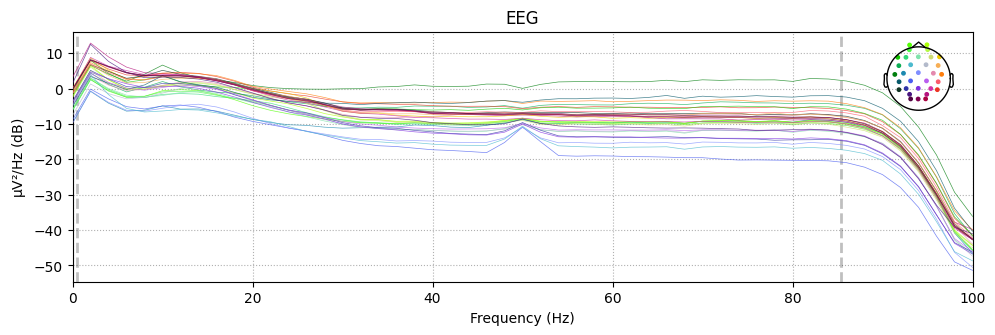

In [6]:
#function to downsample the raw data
def downsample(raw):
    current_sfreq = raw.info['sfreq']
    desired_sfreq = 256
    decim = np.round(current_sfreq / desired_sfreq).astype(int)
    obtained_sfreq = current_sfreq / decim
    lowpass_freq = obtained_sfreq / 3.
    raw.filter(l_freq=None, h_freq=lowpass_freq)

#function to remove theocular noise form the data
def remove_ocular_noise(raw):
    ica = ICA(n_components=0.95, random_state=97)
    ica.fit(raw)
    ica.exclude = []
    eog_indices, eog_scores = ica.find_bads_eog(raw)
    ica.exclude = eog_indices
    ica.apply(raw)

#function to run the preprocessing of the raw data
def preprocess(raw):
    set_meta_data(raw)
    downsample(raw)
    raw.filter(l_freq=0.5, h_freq=None)
    raw.notch_filter(freqs=[50])
    remove_ocular_noise(raw)
    return raw

#runnning the preprocessing techniques on the example data
preprocess(data)

#outputting the result for comparison
data.compute_psd(fmax = 100).plot()

In [12]:
#@authors: Michelle Collins, Jack Eaton Kilgallen
def relabel_VPA_events(events):
    
    for x in range(len(events) - 1):
    #F/C/C
        if events[x][2] == 4 and events[x+1][2] == 10:
            events[x][2] = 12
    #F/C/I
        elif events[x][2] == 4 and events[x+1][2] == 11:
            events[x][2] = 13
    #F/I/C
        elif events[x][2] == 5 and events[x+1][2] == 10:
            events[x][2] = 14
    #F/I/I
        elif events[x][2] == 5 and events[x+1][2] == 11:
            events[x][2] = 15
    #T/C/C
        elif events[x][2] == 6 and events[x+1][2] == 10:
            events[x][2] = 16
    #T/C/I
        elif events[x][2] == 6 and events[x+1][2] == 11:
            events[x][2] = 17
    #T/I/C
        elif events[x][2] == 7 and events[x+1][2] == 10:
            events[x][2] = 18
    #T/I/I
        elif events[x][2] == 7 and events[x+1][2] == 11:
            events[x][2] = 19
            
def relabel_VS_events(events):
    for x in range(len(events) - 1):
    #FLEFT/C
        if events[x][2] == 1 and events[x+1][2] == 10:
            events[x][2] = 12
    #FLEFT/I
        elif events[x][2] == 1 and events[x+1][2] == 11:
            events[x][2] = 13
    #LEFT/C
        elif events[x][2] == 2 and events[x+1][2] == 10:
            events[x][2] = 14
    #LEFT/I
        elif events[x][2] == 2 and events[x+1][2] == 11:
            events[x][2] = 15
    #RIGHT/C
        elif events[x][2] == 3 and events[x+1][2] == 10:
            events[x][2] = 16
    #RIGHT/I
        elif events[x][2] == 3 and events[x+1][2] == 11:
            events[x][2] = 17
    #FRIGHT/C
        elif events[x][2] == 4 and events[x+1][2] == 10:
            events[x][2] = 18
    #FRIGHT/I
        elif events[x][2] == 4 and events[x+1][2] == 11:
            events[x][2] = 19
            
def relabel_SG_events(events):
    for x in range(len(events) - 1):
    #NRSL/C
        if events[x][2] == 1 and events[x+1][2] == 10:
            events[x][2] = 12
        #NRSL/I
        elif events[x][2] == 1 and events[x+1][2] == 11:
            events[x][2] = 13
        #RSL/C
        elif events[x][2] == 2 or events[x][2] == 3 or events[x][2] == 4 and events[x+1][2] == 10:
            events[x][2] = 14
        #RSL/I
        elif events[x][2] == 2 or events[x][2] == 3 or events[x][2] == 4 and events[x+1][2] == 11:
            events[x][2] = 15
        #NRNL/C
        elif events[x][2] == 5 and events[x+1][2] == 10:
            events[x][2] = 16
        #NRNL/I
        elif events[x][2] == 5 and events[x+1][2] == 11:
            events[x][2] = 17
        #RNL/C
        elif events[x][2] == 6 or events[x][2] == 7 or events[x][2] == 8 and events[x+1][2] == 10:
            events[x][2] = 18
        #RNL/I
        elif events[x][2] == 6 or events[x][2] == 7 or events[x][2] == 8 and events[x+1][2] == 11:
            events[x][2] = 19
            
def event_data_processing(raw, task):
    events = mne.find_events(raw, stim_channel='Status')
    if task == "VPA":
        relabel_VPA_events(events)
    elif task == "VS":
        relabel_VS_events(events)
    elif task == "SG":
        relabel_SG_events(events)
        
    raw.add_events(events, stim_channel='Status', replace=True)
    return raw

event_data_processing(data,'VPA')


<RawEDF | example.bdf, 41 x 246272 (481.0 s), ~77.1 MB, data loaded>

In [ ]:
print(data)
events = mne.find_events(data, stim_channel='Status')
        
event_dict = {
    'false/congruent/correct': 12, 'false/congruent/incorrect': 13,
    'false/incongruent/correct': 14, 'false/incongruent/incorrect': 15,
    'true/congruent/correct': 16, 'true/congruent/incorrect': 17,
    'true/incongruent/correct': 18, 'true/incongruent/incorrect': 19}

epochs = mne.Epochs(data, events, event_id=event_dict, tmin=window[0], tmax=window[1], baseline = None, preload=True, on_missing='ignore', decim=4)

for item in event_dict:
    item_epochs = epochs[item]
    evoked_response = item_epochs.average()
    evoked_response.plot(picks = VPA_picks)
    
    #Printing PO3
    evoked_response.set_channel_types({'Fp1': "misc", 'AF3': "misc", 'F7': "misc", 'F3': "misc",'FC1': "misc",\
                                        'FC5': "misc", 'T7': "misc", 'C3': "misc", 'CP1': "misc", 'CP5': "misc",\
                                        'P7': "misc", 'P3': "misc", 'O1': "misc", 'Oz': "misc", 'O2': "misc", 'P4': "misc",\
                                        'P8': "misc", 'CP6': "misc", 'CP2': "misc", 'C4': "misc", 'T8': "misc", 'FC6': "misc", \
                                        'FC2': "misc", 'F4': "misc", 'F8': "misc", "PO4" : "misc", "Pz" : "misc", 'AF4': "misc", \
                                        'Fp2': "misc", 'Fz': "misc", 'Cz': "misc", "PO3" : "eeg"})
    try:
        print(evoked_response.get_peak(ch_type = "eeg" , mode = "pos"))
    except ValueError:
        print("Didnt find epochs of " + item)
        
    #Printing PO4
    evoked_response.set_channel_types({'Fp1': "misc", 'AF3': "misc", 'F7': "misc", 'F3': "misc",'FC1': "misc",\
                                        'FC5': "misc", 'T7': "misc", 'C3': "misc", 'CP1': "misc", 'CP5': "misc",\
                                        'P7': "misc", 'P3': "misc", 'O1': "misc", 'Oz': "misc", 'O2': "misc", 'P4': "misc",\
                                        'P8': "misc", 'CP6': "misc", 'CP2': "misc", 'C4': "misc", 'T8': "misc", 'FC6': "misc", \
                                        'FC2': "misc", 'F4': "misc", 'F8': "misc", "PO3" : "misc", "Pz" : "misc", 'AF4': "misc", \
                                        'Fp2': "misc", 'Fz': "misc", 'Cz': "misc", "PO4" : "eeg"})
    try:
        print(evoked_response.get_peak(ch_type = "eeg" , mode = "pos"))
    except ValueError:
        print("Didnt find epochs of " + item)
        
    #Printing Pz
    evoked_response.set_channel_types({'Fp1': "misc", 'AF3': "misc", 'F7': "misc", 'F3': "misc",'FC1': "misc",\
                                        'FC5': "misc", 'T7': "misc", 'C3': "misc", 'CP1': "misc", 'CP5': "misc",\
                                        'P7': "misc", 'P3': "misc", 'O1': "misc", 'Oz': "misc", 'O2': "misc", 'P4': "misc",\
                                        'P8': "misc", 'CP6': "misc", 'CP2': "misc", 'C4': "misc", 'T8': "misc", 'FC6': "misc", \
                                        'FC2': "misc", 'F4': "misc", 'F8': "misc", "PO4" : "misc", "PO3" : "misc", 'AF4': "misc", \
                                        'Fp2': "misc", 'Fz': "misc", 'Cz': "misc", "Pz" : "eeg"})
    try:
        print(evoked_response.get_peak(ch_type = "eeg" , mode = "pos" ))
    except ValueError:
        print("Didnt find epochs of " + item)